In [1]:
# Importing Libraries
import ast
import seaborn as sns
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [31]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

Text(0, 0.5, '')

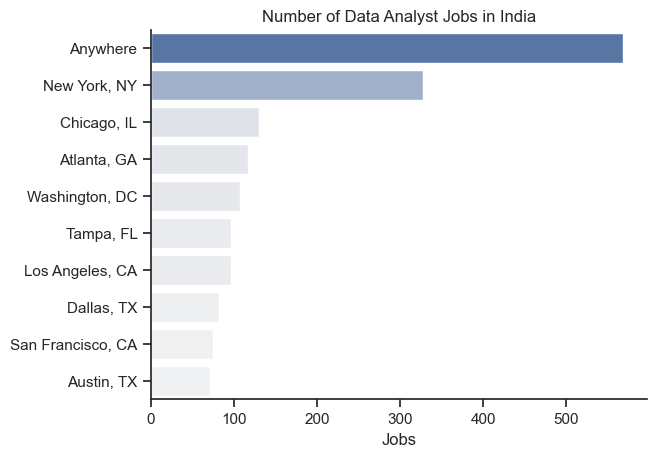

In [ ]:


df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette = 'light:b', legend=False)
sns.despine()
plt.title('Number of Data Analyst Jobs in US')
plt.xlabel('Jobs')
plt.ylabel('')


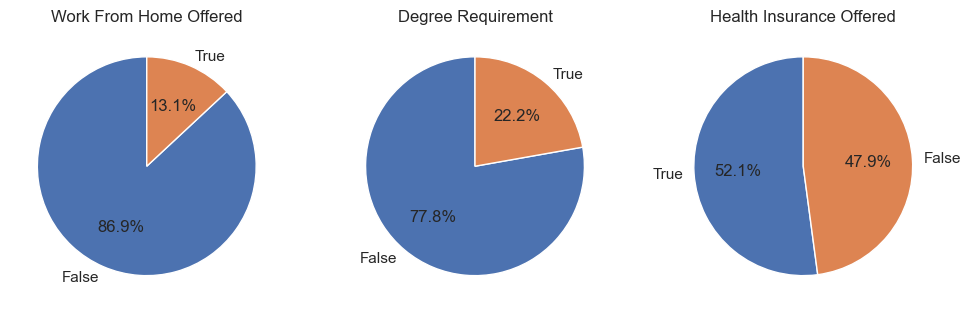

In [ ]:

dict_column = {
    'job_work_from_home': 'Work From Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(12, 5)

for i, (column, title) in enumerate(dict_column.items()):
   
    counts = df_DA_US[column].value_counts()
    pie_labels = counts.index.astype(str).tolist() # Convert index to list of strings
    ax[i].pie(
        counts, 
        labels=pie_labels, 
        autopct='%1.1f%%', 
        startangle=90
    )
    ax[i].set_title(title)
#plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.show()

Text(0, 0.5, '')

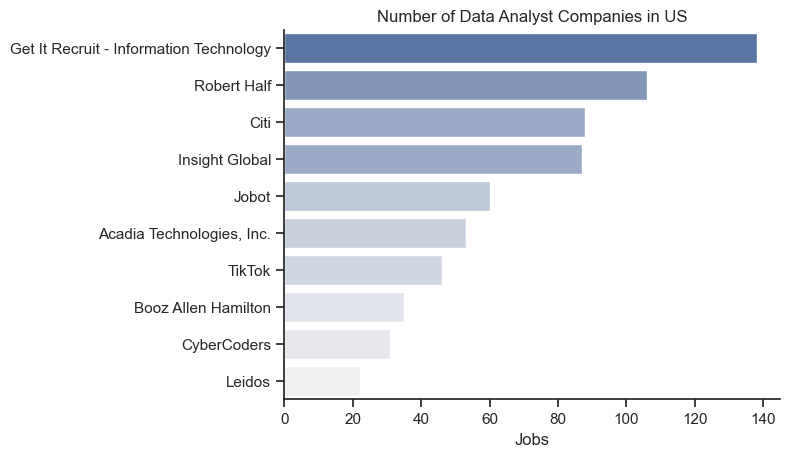

In [34]:


df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette = 'light:b', legend=False)
sns.despine()
plt.title('Number of Data Analyst Companies in US')
plt.xlabel('Jobs')
plt.ylabel('')
